# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glmqu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [5]:
# Choisir une année
year = 1945

In [8]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1945-01-06_01-00004.txt',
 'KB_JB838_1945-01-13_01-00001.txt',
 'KB_JB838_1945-03-23_01-00002.txt',
 'KB_JB838_1945-04-02_01-00003.txt',
 'KB_JB838_1945-04-03_01-00002.txt',
 'KB_JB838_1945-04-10_02-00001.txt',
 'KB_JB838_1945-04-14_01-00001.txt',
 'KB_JB838_1945-04-14_02-00002.txt',
 'KB_JB838_1945-04-17_02-00003.txt',
 'KB_JB838_1945-04-19_02-00001.txt',
 'KB_JB838_1945-04-30_01-00003.txt',
 'KB_JB838_1945-05-02_02-00003.txt',
 'KB_JB838_1945-05-05_02-00001.txt',
 'KB_JB838_1945-05-07_01-00001.txt',
 'KB_JB838_1945-05-09_02-00003.txt',
 'KB_JB838_1945-05-12_01-00002.txt',
 'KB_JB838_1945-05-21_01-00003.txt',
 'KB_JB838_1945-06-01_02-00002.txt',
 'KB_JB838_1945-06-05_01-00001.txt',
 'KB_JB838_1945-06-08_03-00002.txt',
 'KB_JB838_1945-06-10_01-00003.txt',
 'KB_JB838_1945-06-14_03-00002.txt',
 'KB_JB838_1945-06-20_03-00002.txt',
 'KB_JB838_1945-06-21_01-00001.txt',
 'KB_JB838_1945-06-21_03-00001.txt',
 'KB_JB838_1945-06-22_01-00002.txt',
 'KB_JB838_1945-06-27_01-00002.txt',
 

In [10]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [11]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [12]:
# Imprimer les 200 premiers caractères du contenu du premier fichier ([:200] ou [0:200])
content_list[0][:200]

"KBDD envir. Bourse. 1 er janv. sent homme en peau brun, fourré, main gauche. Rapporter, 18, r. des Commercante, bonne réeomp> 27821 PERDE jeudi ' 28 entre 11 h. et midi, Bourse - Nord, mont.-brai dame"

In [14]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [16]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding="utf-8") as f:
    before = f.read()

before[:500]

"KBDD envir. Bourse. 1 er janv. sent homme en peau brun, fourré, main gauche. Rapporter, 18, r. des Commercante, bonne réeomp> 27821 PERDE jeudi ' 28 entre 11 h. et midi, Bourse - Nord, mont.-brai dame or. Souvenir fam.* Bapp. c. b. récomp. & Mme Moucheur, 67, r. Pacification, apr. I9h. 27882 12 34 dée. apr.-midl a paquet confié à chanff. a été enlevé de sa voit, arrêtée r. du Commerce. La per», euscept. restlt. paquet peut s’adr.chauf- feur respons.: 50, aven. Princesse Elisateth, 50, Schaerbeek"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [18]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [19]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1945_clean.txt!'

In [25]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding="utf-8") as f:
    after = f.read()

after[:500]

'kbdd envir bourse janv sent homme peau brun fourré main gauche rapporter commercante bonne réeomp perde jeudi midi bourse nord mont brai dame souvenir fam bapp récomp mme moucheur pacification apr dée apr midl paquet confié chanff enlevé voit arrêtée commerce per euscept restlt paquet adr chauf feur respons aven princesse elisateth schaerbeek discret bonne récomp perdu trousseau clefs fœsé loups arr tram récomp coene chaussée haecht sch perdu dée porte monnaie homi cuir brun cont médailles gros '

## Nuage de mots

### Afficher les termes les plus fréquents


In [26]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rossel', 3629), ('rue', 3316), ('dem', 2627), ('bruxelles', 1918), ('tél', 1731), ('ecr', 1536), ('ecrire', 1215), ('bon', 1035), ('maison', 1013), ('brux', 946)]


### Créer, stocker et afficher le nuage de mots

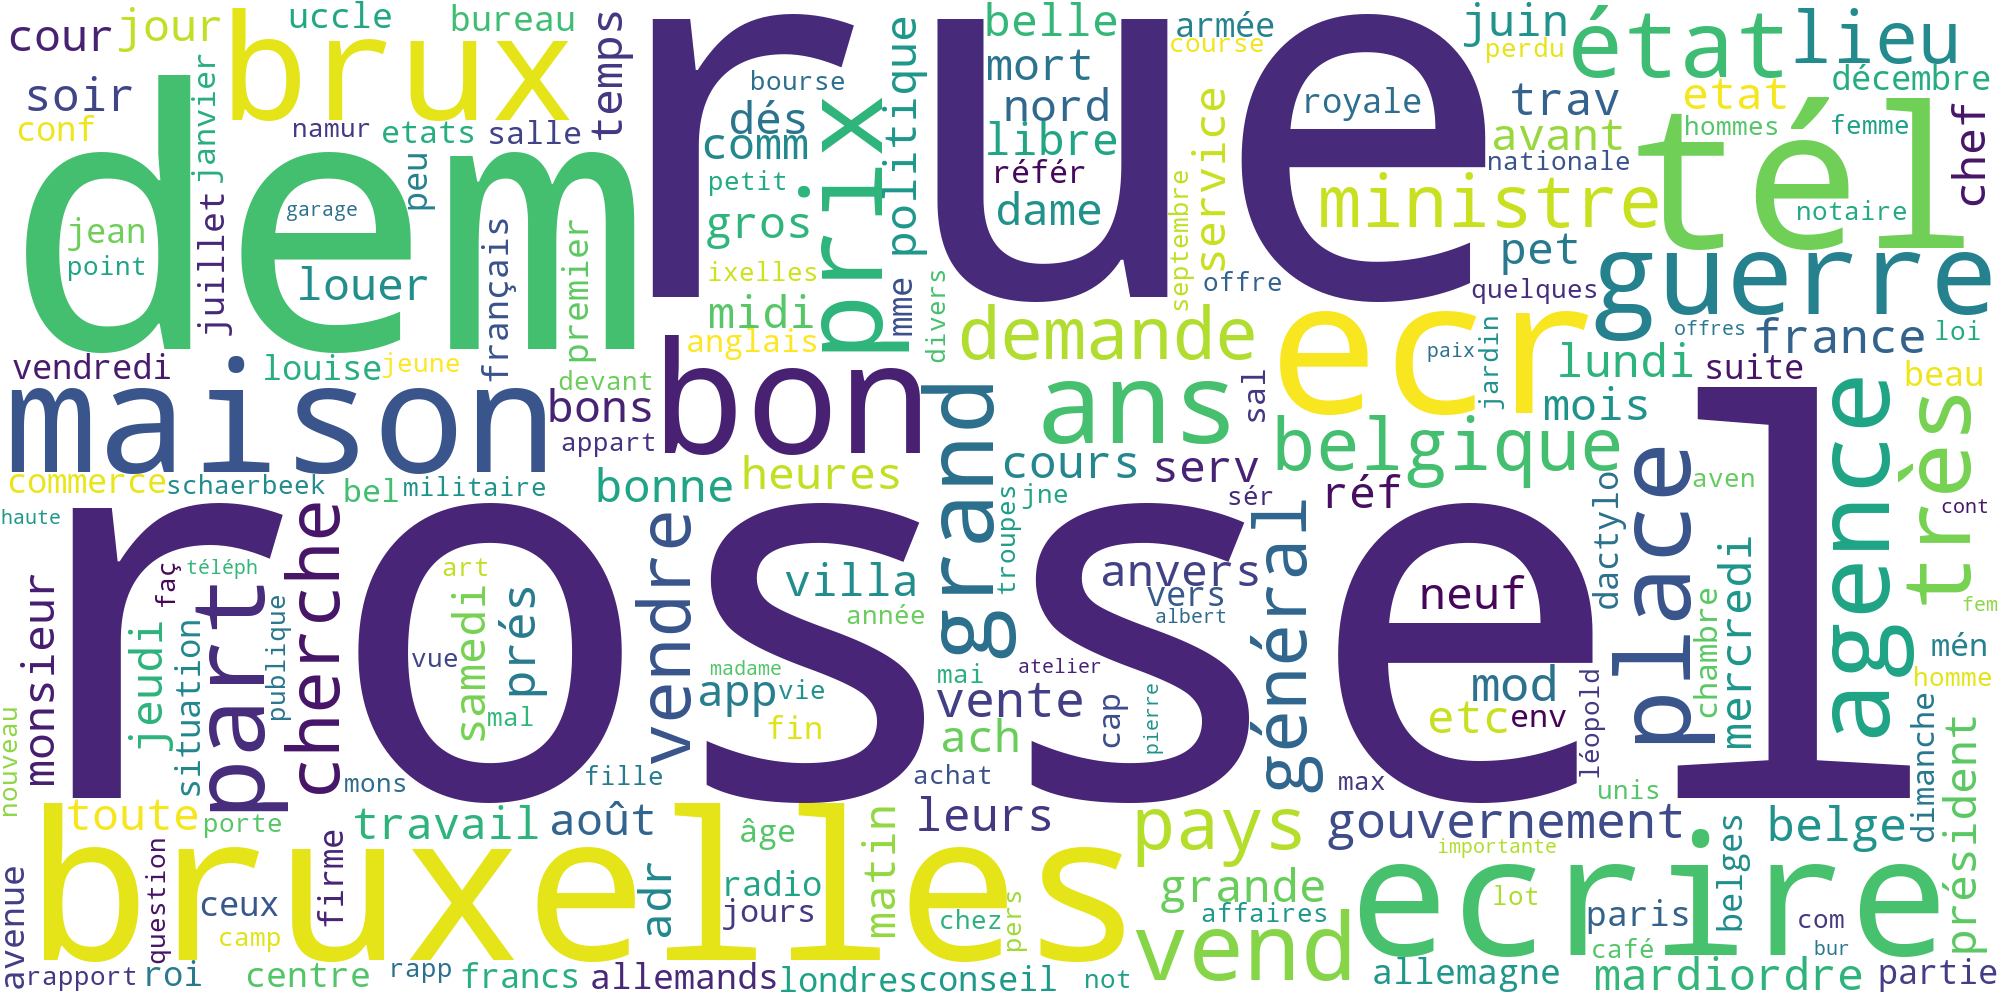

In [27]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))